In [55]:
# [데이터모델링, SQL응용]
#문제 1번.
#1-1) Pclass OneHotEncoding
import pandas as pd
train=pd.read_csv('train.csv')
train
pd.get_dummies(train['Pclass'],prefix='Class')

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [64]:
# 1-2) Age를 이산화(5개 구간으로 나눔)
train['Age']
train['Age'].max()
train['Age'].min()
bins=np.linspace(train['Age'].min(), train['Age'].max(), 5)
train['Ages']=np.digitize(train['Age'], bins)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ages
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


In [66]:
# 1-3) Embarked OneHotEncoding
pd.get_dummies(train['Embarked'],prefix='Port') #get_dummies 함수 사용


,Port_C,Port_Q,Port_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [93]:
# 문제2. 타이타닉호 승객을 사망자와 생존자 그룹으로 나누고
# 각 그룹에 대해 '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구한다. 
# 각 그룹 별로 비율의 전체 합은 1이 되어야 한다.

bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

#died: 사망자 그룹, live: 생존자 그룹
died=train[train['Survived']==0]
live=train[train['Survived']==1]

#사망자, 생존자 각 나이별 그룹화 & value.counts로 null값 해결
died_age_group=pd.cut(died['Age'], bins, labels=labels).value_counts()
live_age_group=pd.cut(live['Age'], bins, labels=labels).value_counts()
died_age_group
live_age_group

#각 그룹별 비율의 합 확인
died_ratio=died_age_group/died_age_group.sum()
live_ratio=live_age_group/live_age_group.sum()

died_ratio.sum() #0.9999999999999999
live_ratio.sum() #1.0

#Null 값 확인 -> value.counts()로 해결 
# died_age_group.isnull().sum() # 사망자 나이 null값 138
# live_age_group.isnull().sum() # 생존자 나이 null값 83

1.0

In [19]:
# 문제1. 길이가 10인 1-벡터를 만드세요.
import numpy as np
arr=np.ones(10)
arr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
# 문제 2. 문제 1에서 만든 벡터에 대해 다섯번째 원소만 1이고 나머지 원소는 모두 0인 벡터를 만드세요.
zero=np.zeros(10)
zero[4]=1
zero

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [4]:
# 문제 3. 10 부터 20까지의 값을 가지는 벡터를 만드세요.
s=np.arange(10,21)
s

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [27]:
# 문제 4.위 벡터의 순서를 바꾸세요.
np.flip(s) #flip함수 사용
sorted(s,reverse=True) #sorted 함수 사용

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]

In [6]:
# 문제 5.0부터 7까지의 값을 가지는 2x4 행렬을 만드세요.
np.arange(8).reshape(2,4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [10]:
# 문제 6.벡터 [1,2,0,0,4,0] 에서 원소의 값이 짝수인 원소만 선택한 벡터를 만드세요.
arr=np.array([1,2,0,0,4,0])
arr[arr%2==0]

array([2, 0, 0, 4, 0])

In [32]:
# 문제 7. 2x2 단위 행렬(identity matrix)을 만드세요
np.eye(2)
np.identity(2)

array([[1., 0.],
       [0., 1.]])

In [43]:
# 문제 8.난수 원소를 가지는 3x3 행렬을 만드세요
random.seed(777)
ran=np.random.rand(3,3)
ran

array([[0.00703843, 0.14987001, 0.4277477 ],
       [0.52724171, 0.61503852, 0.14727186],
       [0.97362728, 0.64518728, 0.56822858]])

In [50]:
# 문제 9.위에서 만든 난수 행렬에서 최대값 / 최소값 원소를 찾으세요.
ran.max()
ran.min()


0.007038434340201127

In [48]:
# 문제 10.위에서 만든 난수 행렬에서 행 평균, 열 평균을 계산하세요.
#열 평균
ran.mean(axis=0)

array([0.50263581, 0.47003194, 0.38108271])

In [47]:
#행 평균
ran.mean(axis=1)

array([0.19488538, 0.4298507 , 0.72901438])

In [153]:
# [Microsoft R 서버를 활용한 빅데이터 분석]
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips") 
# 1. 위 문장을 모두 수행한 후, 아래와 같은 요구사항을 구현하시오.
# 1) tips의 'sex‘ 컬럼의 타입을 문자열로 변환한 다음,
# info함수를 호출하여 결과를 확인하시오.
#tips.info()
#tips.describe

#null값 확인 
#tips.isnull().sum() 

tips['sex']=tips['sex'].astype('object')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 8.8+ KB


In [174]:
# 2) tips의 1,3,5,7번 index행에 저장된 tip 컬럼의 값을 모두 ‘missing'으로 변경하시오

#tips.loc[[1,3,5,7]]

tips.iloc[[1,3,5,7],1] ='missing'
tips

tips.loc[[1,3,5,7],['tip']] = 'missing'
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,missing,missing,missing,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,missing,missing,missing,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2,Female,Yes,Sat,Dinner,2
241,22.67,2,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# 3) scikitlearn에 있는 preprocessing 모듈중 표준화 및 정규화와 관련된 함수를 모두 기술하시오
scikitlearn에서 preprocessing
StandardScaler(x): 평균이 0과 표준편차가 1이 되도록 변환
RobustScaler(x): 중앙값(median)이 0, IQR(Interquartile range)이 1이 되도록 변환.
MinMaxScaler(x): 최대값이 각각 1, 최소값이 0이 되도록 변환.
MaxAbsScaler(x): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환    



In [ ]:
# 2. 표준화와 정규화의 차이점을 설명하시오.
표준화(Standardization): 데이터가 평균으로부터 얼마나 떨어져 잇는지 나타내는 값으로,
특정 범위를 벗어난 데이터는 outlier로 간주, 제거
값의 범위: +-1.96(또는 +-2) 사이의 범위.
=> 데이터 표준화를 통해 Outlier를 제거한다.
공식: 데이터 - 평균 / 표준편차


정규화(Normalization): "0~1"사이의 범위로 데이터를 표준화
=> 데이터의 상대적인 크기 차이를 scale하기 위해.(데이터 상대적 크기 통일) 
공식: 각 데이터 - 데이터의 최솟값 / 데이터의 최댓값 - 데이터의 최솟값
방법: 1)손 공식(공식을 직접 코딩하는 방법). 
    2) MinMaxScaler 함수 사용.
    3) sklearn.preprocessing 패키지 사용.(from sklearn.preprocessing import minmax_scale)

In [ ]:
# 3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도를 기술하시오.
라이브러리: pandas
용도: pandas 이용하여 결측값 처리, 평균이나 중앙치로 대체, 이상치 처리, 
    또한 표준화 작업, 정규화 작업을 통해 데이터 전처리를 할 수있다.


In [ ]:
# [파이썬 기본문법과 통계기초]
# 다음 실행 예시처럼 교환할 돈을 입력받아서, 최소한의 동전의 개수로 교환해 주는 파이썬 코드를 작성하시오.
# 바꿀 돈 -->7777
# 500원: 15 , 100원: 2 , 50원: 1 , 10원 2 , 나머지: 7

def change_current():
    
    original_price= int(input("교환할 돈 입력: "))
    k=[]
    for j in original_price:
        if j//500 =k:

            print("500원: "+{0}+" 100원: "+{1}+" 50원: "+{2}+"".format(k))
        

In [179]:
print("500원: {0} 100원: {1} 50원: {2}".format(1,2,3))

500원: 1 100원: 2 50원: 3


In [186]:
# [파이썬 기본문법과 통계기초]
# 다음 실행 예시처럼 교환할 돈을 입력받아서, 최소한의 동전의 개수로 교환해 주는 파이썬 코드를 작성하시오.
# 바꿀 돈 -->7777
# 500원: 15 , 100원: 2 , 50원: 1 , 10원 2 , 나머지: 7

cash=int(input("금액을 입력하세요:"));

#기존 화폐 저장
cash_org=cash;

#금액별 화폐수 분류
c500=cash//500;
cash=cash-c500*500;
c100=cash//100;
cash=cash-c100*100;
c10=cash//10;
cash=cash-c10*10;
c1=cash//1;
cash=cash-c1*1;
print("cash=",cash_org," 500원:",c500," 100원:",c100," 10원:",c10," 1원:",c1)

금액을 입력하세요:777
cash= 777  500원: 1  100원: 2  10원: 7  1원: 7


In [180]:
x = int( input('거스름돈 입력 : ') )
 
if x <= 0:
    print('거스름돈 없음')
    
y500 = x//500; x %= 500
y100 = x//100; x %= 100
y50 = x//50; x %= 50
y10 = x//10; x %= 10
y1 = x
 
print('500원\t:', y500, '개')
print('100원\t:', y100, '개')
print('50원\t:', y50, '개')
print('10원\t:', y10, '개')
print('1원\t:', y1, '개')

거스름돈 입력 : 300
500원	: 0 개
100원	: 3 개
50원	: 0 개
10원	: 0 개
1원	: 0 개


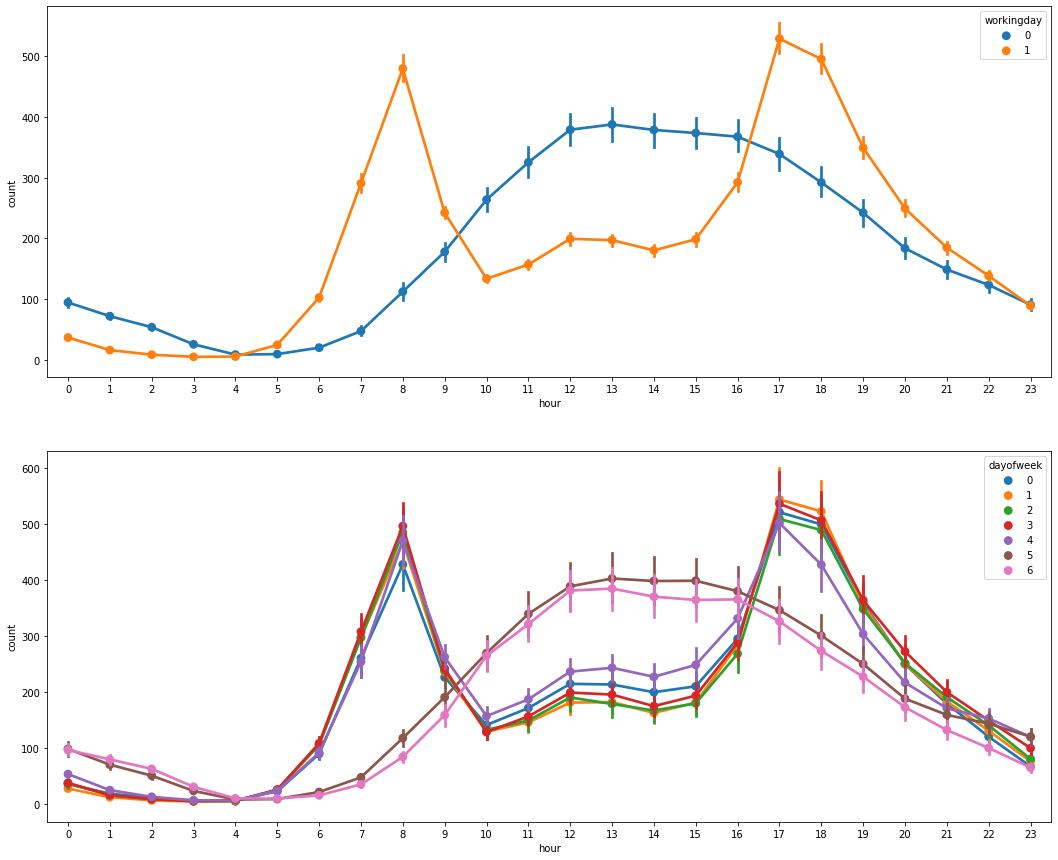

In [110]:
# [파이썬 기본문법과 통계기초]
# bike sharing command 데이터를 불러온 후, 
# workingday 및 dayofweek에 대한 
# 시간대별 자전거 이용자 수(count)를 시각화하는 프로그램을 작성하시오.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
train=pd.read_csv('bk_train.csv',parse_dates=["datetime"]) #object-> datetime64[ns]

train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek

fig,(ax1, ax2)=plt.subplots(nrows=2)
fig.set_size_inches(18,15)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek',ax=ax2)
